# sprint24課題 ゲート付きリカレントニューラルネットワーク

この課題の**目的**
- 発展的なRNNの手法を理解する

`KerasのRecurrentレイヤー`

Kerasには複数のRecurrentレイヤーが用意されています。  
今回のSprintではこれら全てを動かし、それらを理解し区別できる状態を目指します。  
以下のドキュメントにまとめられています。  
[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)  

次の11個の項目があります。  
- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell 
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

# 【問題1】各種手法の実行

Keras公式のサンプルをスタートコードとします。これを元に、上記11個の項目全てを使用してください。  
例えばこの中でSimpleRNNとLSTMなどは並列関係であり、精度の比較が行えます。そういった関係を見つけて比較をしてください。  
なおConvLSTM2Dのみ2次元配列を受け付ける手法であり、他と単純な精度の比較はできません。

`LSTMのサンプルコード`  
[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)  

`ConvLSTM2Dのサンプルコード`  
[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)  

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。  
全て実行する上での実行時間を考慮した数に設定してください

### 映画のレビューを使って手法を比較。

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [3]:
# 単語を整数にマッピングする辞書
word_index = imdb.get_word_index()

# インデックスの最初の方は予約済み
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [4]:
print(decode_review(x_train[1]))
print(y_train[1])

<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
0


## LSTMのサンプル

In [5]:
import random
name = ['a','i','u','e','o','ka','ki','ku','ke','ko']
sample_list = []

for i in range(30):
    sample = random.sample(name, 1)
    sample_list.append(sample)


In [12]:
import numpy as np
np.unique(sample_list,return_counts=True,)

(array(['a', 'e', 'i', 'ka', 'ke', 'ki', 'ko', 'ku', 'o', 'u'], dtype='<U2'),
 array([3, 2, 1, 3, 2, 4, 4, 2, 5, 4]))

In [14]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 134s 5ms/step - loss: 0.4553 - acc: 0.7838 - val_loss: 0.3777 - val_acc: 0.8353
Epoch 2/3
25000/25000 [==============================] - 133s 5ms/step - loss: 0.2922 - acc: 0.8814 - val_loss: 0.4013 - val_acc: 0.8283
Epoch 3/3
25000/25000 [==============================] - 26s 1ms/step
Test score: 0.4230300973987579
Test accuracy: 0.83032


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras import layers
import keras.backend as K
from keras.callbacks import EarlyStopping

In [17]:
# このモデルをベースとするため関数化する
def build_fit_eval(add_model,name, epochs=3):
    K.clear_session()
    print('Build model...')
    model = Sequential(name=name)
    model.add(Embedding(max_features, 128))
    model.add(add_model)
    model.add(Dense(1, activation='sigmoid'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    print('Train...')
    early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=3)
    hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping]
             )
    score, acc = model.evaluate(x_test, y_test,
                                batch_size=batch_size)
    print('Test score:', score)
    print('Test accuracy:', acc)
    return model, hist

In [18]:
#lossとaccuracyを出力する関数を作成
import matplotlib.pyplot as plt
# loss
def plot_history_loss(model, hist):
    # Plot the loss in the history
    axL.plot(hist.history['loss'],label="{} for training".format(model.name))
    axL.plot(hist.history['val_loss'],label="{} for validation".format(model.name))
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(model, hist):
    # Plot the loss in the history
    axR.plot(hist.history['acc'],label="{} for training".format(model.name))
    axR.plot(hist.history['val_acc'],label="{} for validation".format(model.name))
    axR.set_title('{} accuracy'.format(model.name))
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

## RNN

In [19]:
# クラスを定義
class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
rnn_1 (RNN)                  (None, 128)               32768     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,592,897
Trainable params: 2,592,897
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 25s 1ms/step - loss: 0.5323 - acc: 0.7194 - val_loss: 0.3869 - val_acc: 0.8311
Epoch 2/3
25000/25000 [==============================] - 24s 970us/step - loss: 0.3663 - acc: 0.8396 - val_loss: 0.4175 - val_acc: 0.8062
Epoch 3/3
25000/25000 [====================

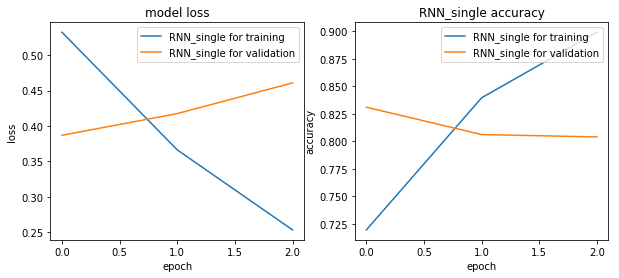

In [20]:
# １つのセルを引数として渡して実行
cell = MinimalRNNCell(128)
single_rnn, single_rnn_hist = build_fit_eval(layers.RNN(cell),name='RNN_single',epochs=3)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(single_rnn, single_rnn_hist)
plot_history_acc(single_rnn, single_rnn_hist)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
rnn_1 (RNN)                  (None, 128)               25600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,585,729
Trainable params: 2,585,729
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 35s 1ms/step - loss: 0.5057 - acc: 0.7458 - val_loss: 0.3728 - val_acc: 0.8332
Epoch 2/3
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2877 - acc: 0.8830 - val_loss: 0.4119 - val_acc: 0.8116
Epoch 3/3
25000/25000 [======================

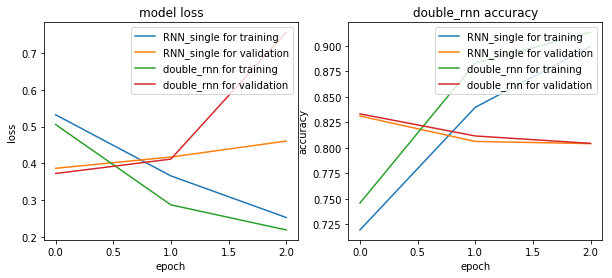

In [21]:
#複数のセルで渡す。
cells = [MinimalRNNCell(32),MinimalRNNCell(128)]
double_rnn, double_rnn_hist = build_fit_eval(layers.RNN(cells),name='double_rnn',epochs=3)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(single_rnn, single_rnn_hist)
plot_history_loss(double_rnn, double_rnn_hist)
plot_history_acc(single_rnn, single_rnn_hist)
plot_history_acc(double_rnn, double_rnn_hist)

このRNNクラスはcellクラスを与える使い方でちょっと難しい。  
冒頭のMinimalRNNCell　などのようにcellクラスを作成してそのリストを引数として渡す。

## SimpleRNN

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 35s 1ms/step - loss: 0.6764 - acc: 0.5586 - val_loss: 0.6444 - val_acc: 0.5996
Epoch 2/3
25000/25000 [==============================] - 34s 1ms/step - loss: 0.5737 - acc: 0.6961 - val_loss: 0.5751 - val_acc: 0.6902
Epoch 3/3
25000/25000 [======================

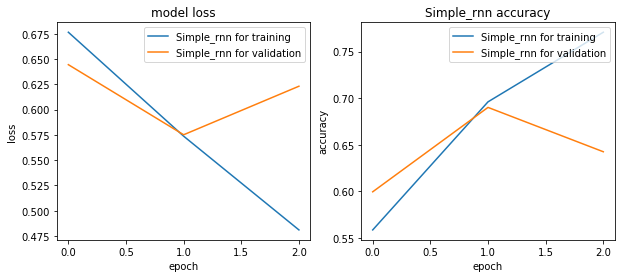

In [22]:
simple_rnn, simple_rnn_hist = build_fit_eval(layers.SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2),name='Simple_rnn',epochs=3)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(simple_rnn, simple_rnn_hist)
plot_history_acc(simple_rnn, simple_rnn_hist)

## GRU

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________
None
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 107s 4ms/step - loss: 0.4710 - acc: 0.7724 - val_loss: 0.3930 - val_acc: 0.8257
Epoch 2/3
25000/25000 [==============================] - 106s 4ms/step - loss: 0.2870 - acc: 0.8836 - val_loss: 0.3522 - val_acc: 0.8466
Epoch 3/3
25000/25000 [====================

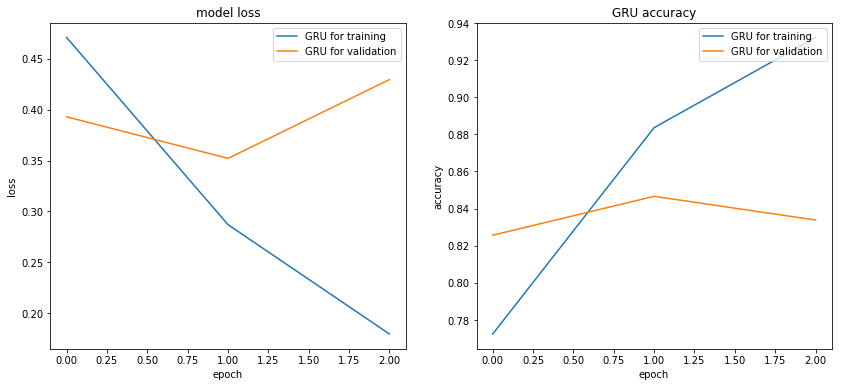

In [23]:
gru, gru_hist = build_fit_eval(layers.GRU(128, dropout=0.2, recurrent_dropout=0.2),name='GRU',epochs=3)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(14,6))
plot_history_loss(gru, gru_hist)
plot_history_acc(gru, gru_hist)

## その他
SimpleRNNCell・・・SimpleRNNのCellクラス．  
GRUCell・・・GRUレイヤーのためのCellクラス.  
LSTMCell・・・ LSTMレイヤーのためのcellクラス  
StackedRNNCells・・・RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー． 効率的なstacked RNNを実装するために使われます．cellをスタッキングするときに使う。  
CuDNNGRU・・・CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作する。  
CuDNNLSTM・・・CuDNNを利用した高速なLSTM実装． TensorFlowバックエンドでGPU上でのみ動作する．  
cuDNNはNVIDIAが公開しているDeep Learning用のライブラリである。このライブラリを使うとCaffeやChainerなどのDeep Learning用のソフトウェアの速度が向上する。 この速度向上に寄与している最も大きな部分がConvolutionの高速化である。  

# 残りのクラスを比較する

In [26]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, SimpleRNNCell, GRUCell, LSTMCell,StackedRNNCells,CuDNNGRU, CuDNNLSTM,RNN
from keras.datasets import imdb
import keras
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=0, verbose=1)
import keras.backend as K


In [27]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32
units = 128

In [28]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...


In [29]:
cells = [
    SimpleRNNCell(units),
    GRUCell(units),
    LSTMCell(units),
]
history=[]
model_list=[]
model_list.append(("CuDNNGRU" ,CuDNNGRU(units=units, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)))
model_list.append(("CuDNNLSTM" ,CuDNNLSTM(units=units, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)))
model_list.append(("StackedRNNCells" ,RNN(StackedRNNCells(cells))))
model_list.append(("GRUCell" ,RNN(GRUCell(units=units))))
model_list.append(("LSTMCell" ,RNN(LSTMCell(units=units))))

In [30]:
model = Sequential()
for key,model_item in model_list:
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(model_item)
    model.add(Dense(1, activation='sigmoid'))
    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    print("使用したモデル  ",key)
    print('Train...')
    history.append((key,model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=3,
                  validation_data=(x_test, y_test),
                  callbacks=[early_stopping])))
    score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)

    print('Test score:', score)
    print('Test accuracy:', acc)
    keras.backend.clear_session()
    model = Sequential()

使用したモデル   CuDNNGRU
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 48s 2ms/step - loss: 0.4235 - acc: 0.7971 - val_loss: 0.3434 - val_acc: 0.8491
Epoch 2/3
25000/25000 [==============================] - 17s 663us/step - loss: 0.2293 - acc: 0.9082 - val_loss: 0.3785 - val_acc: 0.8285
Epoch 00002: early stopping
25000/25000 [==============================] - 4s 153us/step
Test score: 0.3785218538856506
Test accuracy: 0.82852
使用したモデル   CuDNNLSTM
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 18s 725us/step - loss: 0.4270 - acc: 0.7986 - val_loss: 0.3556 - val_acc: 0.8432
Epoch 2/3
25000/25000 [==============================] - 18s 702us/step - loss: 0.2479 - acc: 0.9015 - val_loss: 0.4245 - val_acc: 0.8284
Epoch 00002: early stopping
25000/25000 [==============================] - 4s 158us/step
Test score: 0.4245416665267944
Test accuracy: 0.82844
使用したモデル

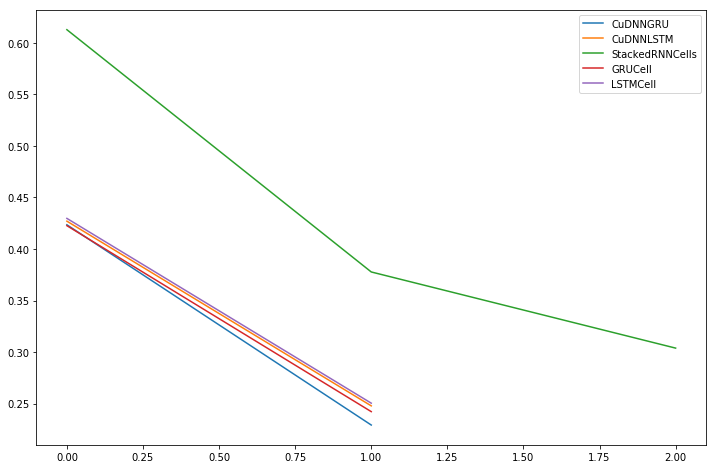

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8)) #...1
ax = fig.add_subplot(111) #...2
for i in range(len(history)):
    ax.plot(history[i][1].history["loss"],label=history[i][0])
plt.legend()
plt.show()

In [1]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as pplt

Using TensorFlow backend.


In [2]:
# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

Train on 950 samples, validate on 50 samples
Epoch 1/5
950/950 [==============================] - 98s 104ms/step - loss: 0.3032 - val_loss: 0.1926
Epoch 2/5
950/950 [==============================] - 97s 102ms/step - loss: 0.1453 - val_loss: 0.1356
Epoch 3/5
950/950 [==============================] - 97s 102ms/step - loss: 0.0921 - val_loss: 0.0788
Epoch 4/5
950/950 [==============================] - 98s 103ms/step - loss: 0.0511 - val_loss: 0.0941
Epoch 5/5
950/950 [==============================] - 97s 102ms/step - loss: 0.0340 - val_loss: 0.0471


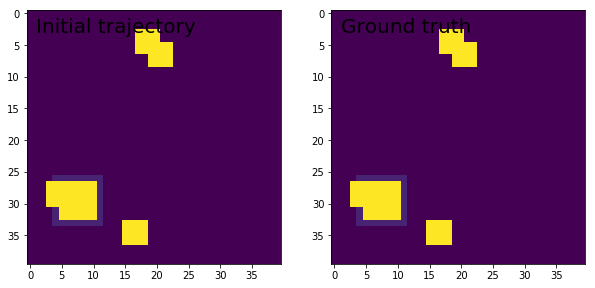

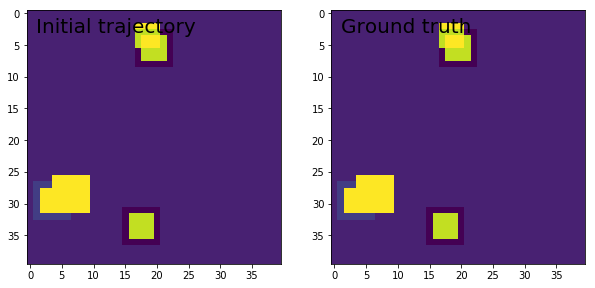

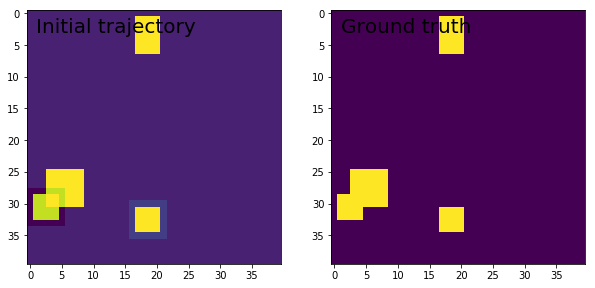

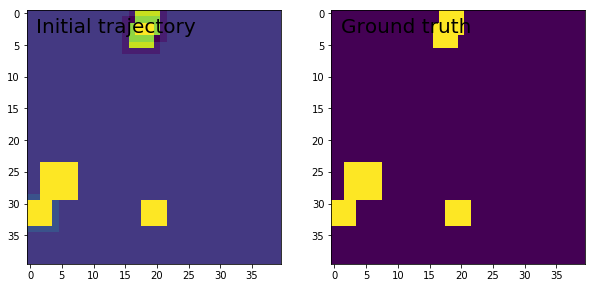

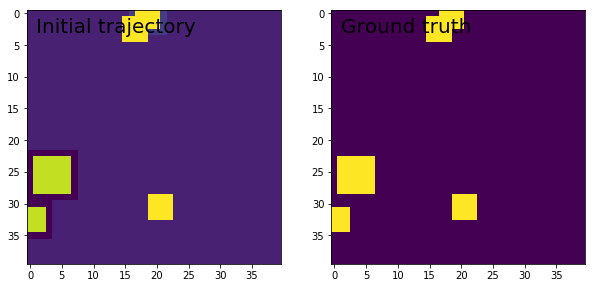

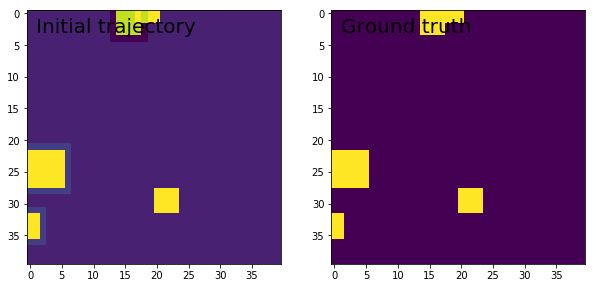

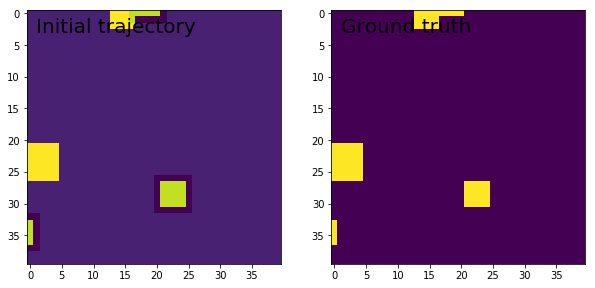

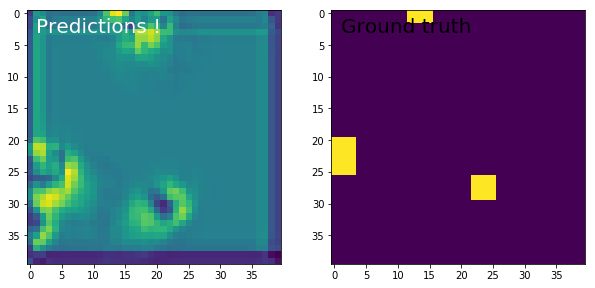

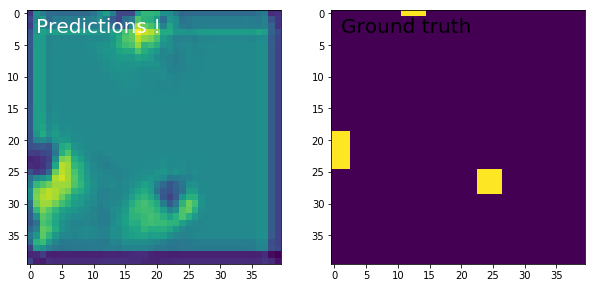

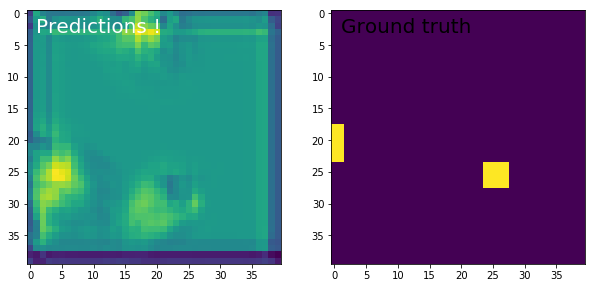

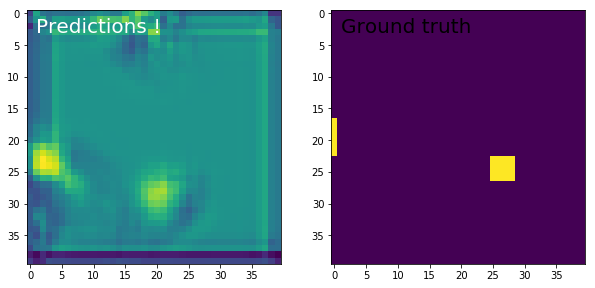

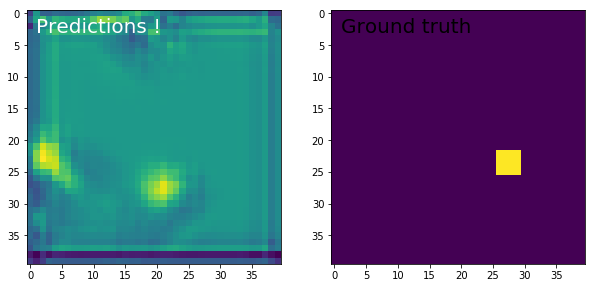

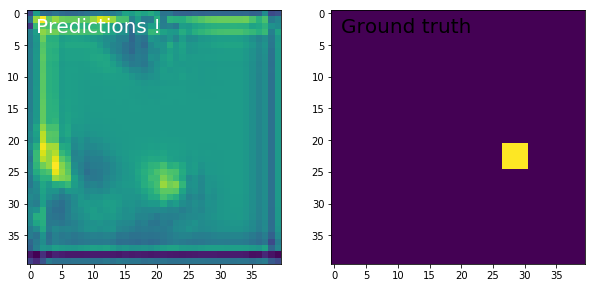

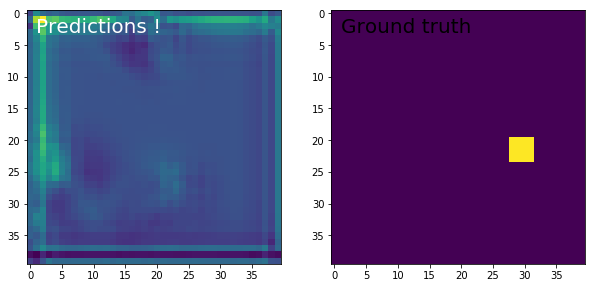

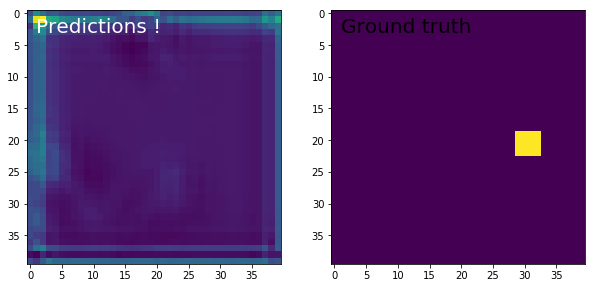

In [6]:
# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=50,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = pplt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    pplt.imshow(toplot)
    ax = fig.add_subplot(122)
    pplt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    pplt.imshow(toplot)
    pplt.savefig('%i_animate.png' % (i + 1))